[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


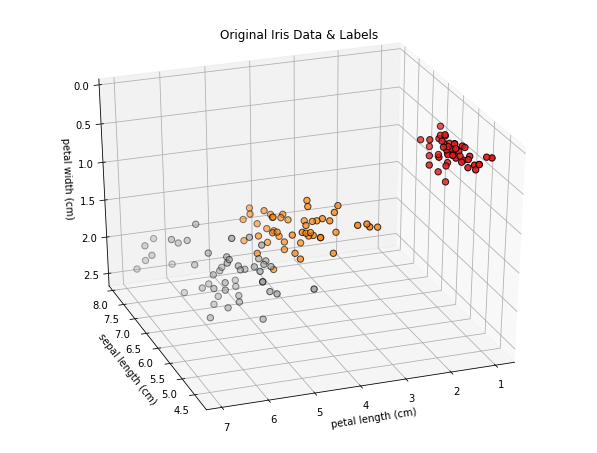

In [31]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

# Take a look at the iris dataset
print(iris.data[:, :4][:5])
print(iris.feature_names)
print(iris.target)
print(iris.target_names)

X = iris.data[:, :4] # take the first 3 features (Sepal Length, Sepal Width, Petal Length and Petal Width)

# Plot 3D Figure of the iris data with color as TRUE LABELS
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[:, 2], X[:, 0], X[:, 3], c=y_iris,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Original Iris Data & Labels")
ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[0])
ax.set_zlabel(iris.feature_names[3])
plt.show()


**NEXT: Fill in the blank code to run KMeans on the Iris Dataset!**

sklearn instructions for running KMeans can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

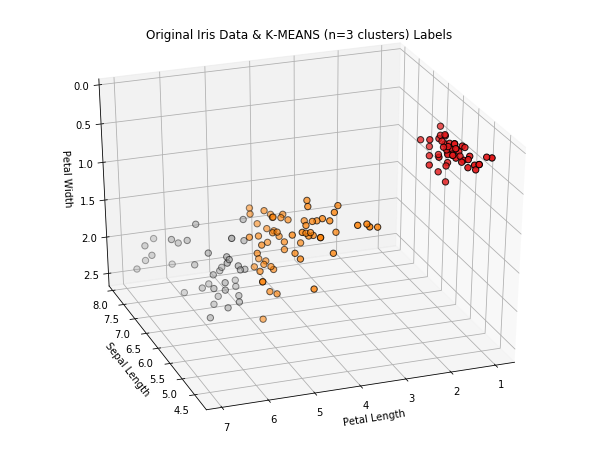

In [23]:
# Run K-Means on the data with n=3 clusters & see how it compares to the labeled data...
n_clust = 3

# Insert code and Run the KMeans algorithm below

# Grab the KMeans labels (hint: labels are listed as an 'attribute' in the weblink for KMeans)
k_means_labels = k_means.labels_ 

# Plot 3D Figure of the iris data with color as K-MEANS LABELS 
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[:, 2], X[:, 0], X[:, 3], c=k_means_labels,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Original Iris Data & K-MEANS (n={} clusters) Labels".format(n_clust))
ax.set_xlabel("Petal Length")
ax.set_ylabel("Sepal Length")
ax.set_zlabel("Petal Width")
plt.show()

Now, repeat the above code with n= 0 - 5 clusters and see how the results change.

**Run the KMeans Mini Batch algorithm to cluster the iris data** Instructions found here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html

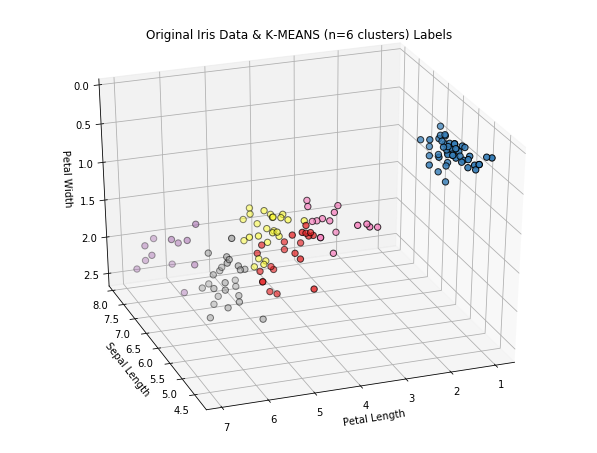

In [25]:
# Run K-Means on the data with n=3 clusters & see how it compares to the labeled data...
n_clust = 6

# Insert code and Run the KMeans MiniBatch below


# Grab the KMeans labels (hint: labels are listed as an 'attribute' in the weblink for KMeans)
k_meansMB_labels = mbk.labels_


# Plot 3D Figure of the iris data with color as K-MEANS LABELS 
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[:, 2], X[:, 0], X[:, 3], c=k_meansMB_labels,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Original Iris Data & K-MEANS (n={} clusters) Labels".format(n_clust))
ax.set_xlabel("Petal Length")
ax.set_ylabel("Sepal Length")
ax.set_zlabel("Petal Width")
plt.show()

Change the size of the MiniBatch and the number of clusters to see how the clustering results change

Another unsupervised learning method is Gaussian Mixture, and we can also test this method on the iris dataset, used above.

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

colors = ['navy', 'turquoise', 'darkorange']
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

In [ ]:
# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))

X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

In [ ]:
# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)

In [ ]:
for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)
plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))

plt.show()